In [1]:
!python train.py --data_dir ../../output/BoneMarrowB_BoneMarrowA/CACNN_output.h5ad \
                --train_name_list BoneMarrowB --test_name BoneMarrowA \
                --save_path ../../output \
                --save_name BoneMarrowB_BoneMarrowA \
                --epochs 1000 \
                --lr 0.001 \
                --weight_decay 0.01 \
                --num_layers 4 \
                --patience 50 \
                --dropout 0.0 \
                --kernel simple \
                --use_graph \
                --use_bn \
                --use_residual \
                --use_weight

shape of concat train data:
	(4370, 64)
shape of concat test data:
	(4033, 64)
----------after remove unknown----------
shape of train data: (4189, 64)
shape of test data: (3944, 64)
----------after remove rare----------
shape of train data: (4179, 64)
shape of test data: (3936, 64)
----------after intersect----------
shape of train data: (4179, 64)
shape of test data: (3936, 64)
----------after SMOTE----------
shape of train data: (7201, 64)
shape of test data: (3936, 64)
computing PCA
    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 34 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
computing ridge regression
	finished: `.X` now features regression residuals
	`.layers['X_explained']` stores the expression

<Figure size 7680x5760 with 0 Axes>

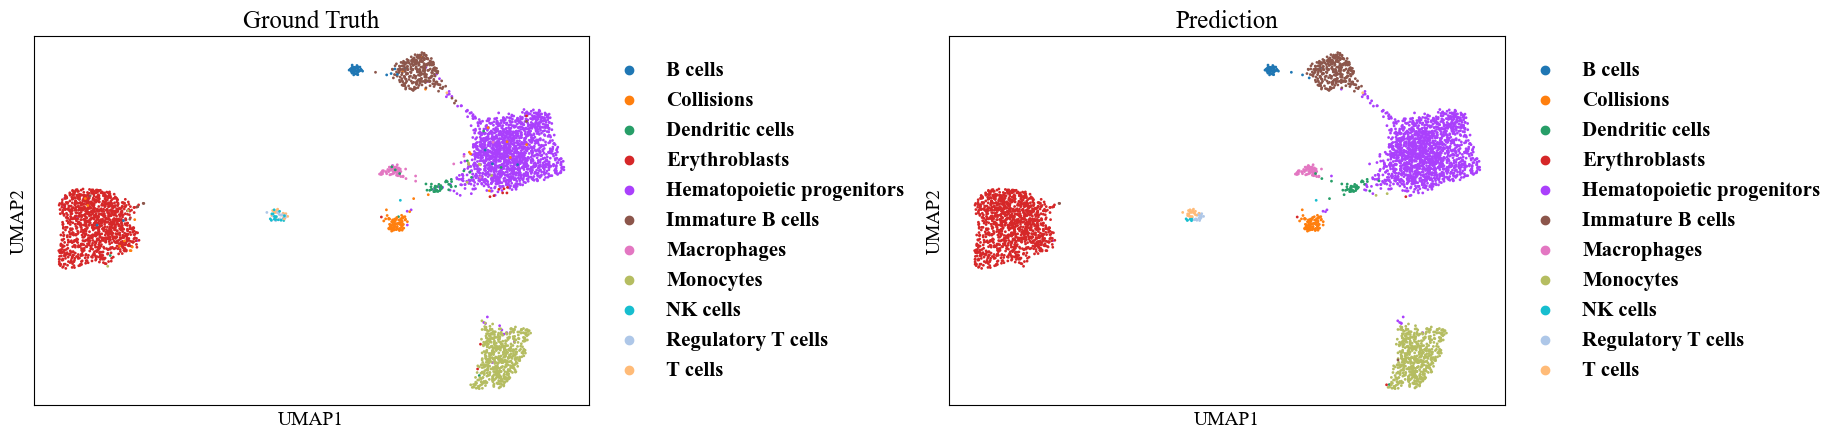

In [6]:
import matplotlib.pyplot as plt
import scanpy as sc
import matplotlib.font_manager as fm

# 将全局字体设置为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 设置所有文本元素的更大字体大小
plt.rcParams['font.size'] = 14  # 基本字体大小
plt.rcParams['axes.titlesize'] = 18  # 标题字体大小
plt.rcParams['axes.labelsize'] = 14  # 坐标轴标签字体大小
plt.rcParams['xtick.labelsize'] = 12  # X轴刻度标签
plt.rcParams['ytick.labelsize'] = 12  # Y轴刻度标签
plt.rcParams['legend.fontsize'] = 14  # 图例字体大小

# 加载数据
adata = sc.read_h5ad("/home/daozhang/ChIP-SANGO/output/BoneMarrowB_BoneMarrowA/embedding.h5ad")
adata = adata[adata.obs["Batch"] == "BoneMarrowA"]

# 设置图形参数，提高分辨率
plt.figure(dpi=1200)

# 计算邻居和UMAP
sc.pp.neighbors(adata, n_neighbors=25, use_rep='X', n_pcs=40)
sc.tl.umap(adata)

# 使用更大字体绘制UMAP
with plt.rc_context({'font.family': 'Times New Roman'}):
    sc.pl.umap(
        adata, 
        color=["CellType", "Pred"], 
        title=["Ground Truth", "Prediction"], 
        legend_fontsize=15,  # 增加图例字体大小
        legend_fontoutline=2,  # 添加轮廓使文本更易读
        frameon=True,  # 在图周围添加框架
        wspace=0.5,
        size=16,  # 增加点的大小以提高可见度
        save="_BoneMarrowB_BoneMarrowA_GroundTruth_Pred.svg"
    )

In [3]:
import os
import pandas as pd
# Save Annotation and Ground Truth as a CSV file
annotation = adata.obs["Pred"].values  # Predicted labels as Annotation
ground_truth = adata.obs['CellType'].values  # True labels as Ground_truth

# Create a DataFrame
df = pd.DataFrame({
    'true_label': ground_truth,
    'predicted_label': annotation
})

# Save to CSV
csv_path = os.path.join("/home/daozhang/ChIP-SANGO/output/BoneMarrowB_BoneMarrowA", "BoneMarrowB_BoneMarrowA_ref0_query1.csv")
df.to_csv(csv_path, index=False)

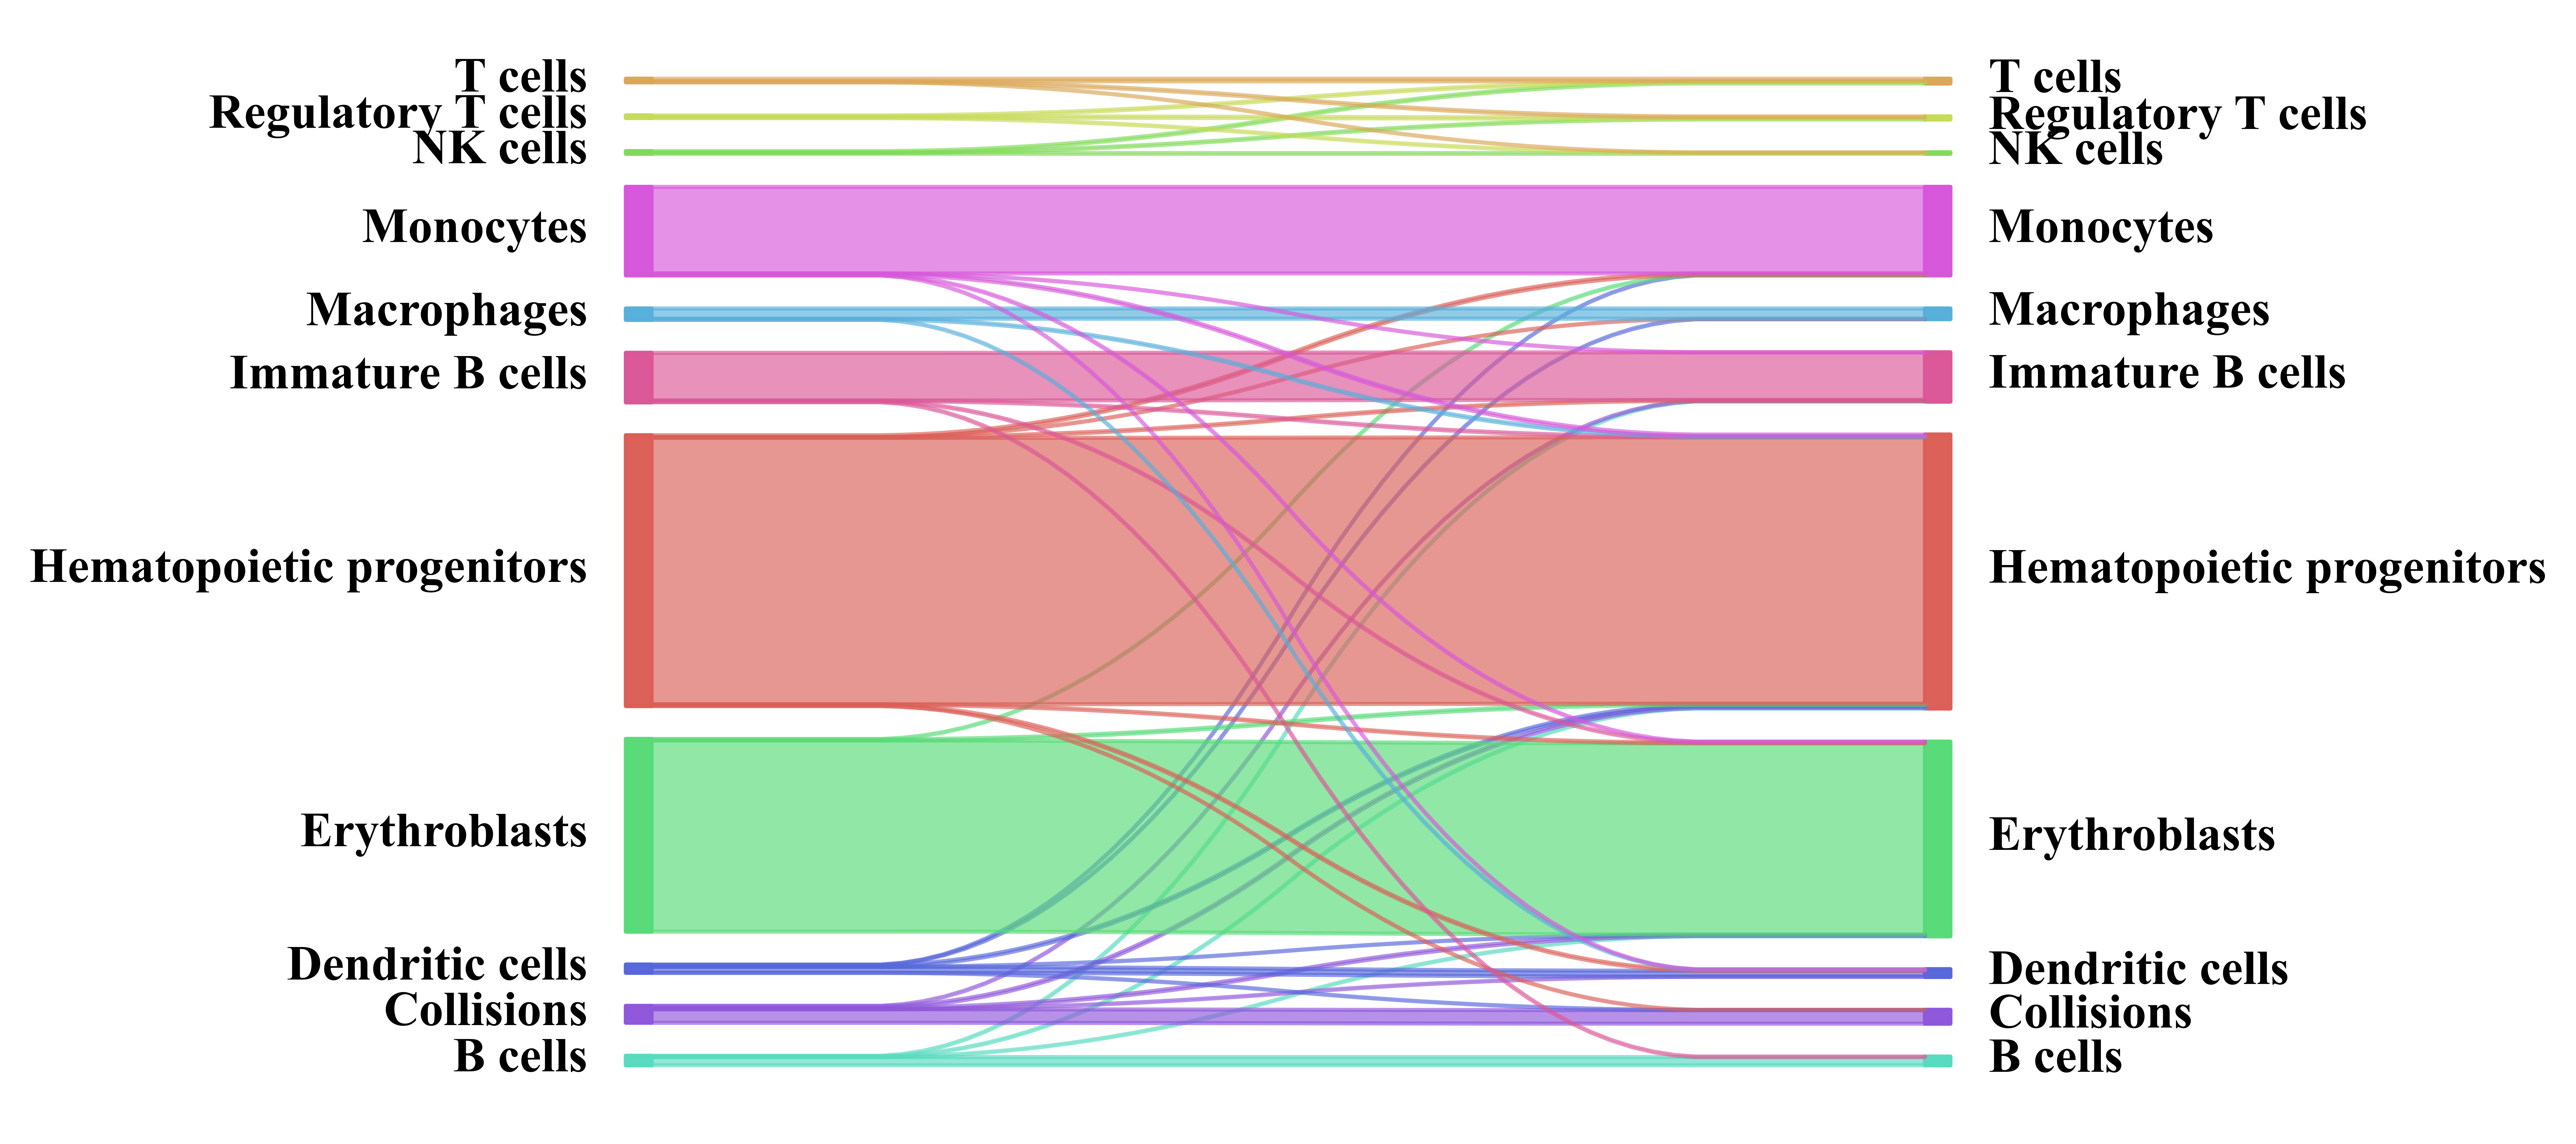

In [4]:
# from pySankey.sankey import sankey
import matplotlib.pyplot as plt
import numpy as np
from pysankey import sankey

plt.rcParams['font.family'] = 'Times New Roman'


pred_col = 'Pred'
true_col = 'CellType'

plt.rcParams['font.weight'] = "heavy"
plt.figure(dpi=1200)
sankey(
    adata.obs[true_col], adata.obs[pred_col], aspect=10,
    fontsize=12, leftLabels = list(np.unique(adata.obs[true_col])), rightLabels = list(np.unique(adata.obs[pred_col]))
    )
plt.savefig("/home/daozhang/ChIP-SANGO/ChIP-SANGO/DIFFormer/figures/sankey_BoneMarrowB_BoneMarrowA_GroundTruth_Pred.svg", bbox_inches="tight")
